# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-26 20:00:03.164390


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/25/20


,12/25/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,18756360,330246,1.76
Brazil,7448560,190488,2.56
India,10169118,147343,1.45
Mexico,1372243,121837,8.88
Italy,2028354,71359,3.52
United Kingdom,2227947,70302,3.16
France,2604595,62548,2.40


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/25/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
59661,US,18458373,2020-12-23,326124.0,3359.0,228131.0,212142.428571
59660,US,18230242,2020-12-22,322765.0,3401.0,195033.0,214895.571429
59659,US,18035209,2020-12-21,319364.0,1696.0,190519.0,215428.857143
59658,US,17844690,2020-12-20,317668.0,1509.0,189099.0,215761.285714
59657,US,17655591,2020-12-19,316159.0,2549.0,196295.0,216053.142857
59656,US,17459296,2020-12-18,313610.0,2821.0,249709.0,219324.285714
59655,US,17209587,2020-12-17,310789.0,3346.0,236211.0,217094.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/25/20


,12/25/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,903716,37158.0,4.11
Texas,1662724,26896.0,1.62
California,2060797,23958.0,1.16
Florida,1247546,20995.0,1.68
New Jersey,454902,18595.0,4.09
Illinois,930849,17154.0,1.84
Pennsylvania,601940,14837.0,2.46


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/25/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
2031,California,2002494,2020-12-23,23558.0,319.0,43986.0,41990.714286
2030,California,1958508,2020-12-22,23239.0,402.0,34621.0,44823.714286
2029,California,1923887,2020-12-21,22837.0,162.0,39854.0,44627.714286
2028,California,1884033,2020-12-20,22675.0,93.0,41476.0,42665.000000
2027,California,1842557,2020-12-19,22582.0,212.0,40362.0,41911.571429
2026,California,1802195,2020-12-18,22370.0,276.0,48221.0,40854.285714
2025,California,1753974,2020-12-17,22094.0,277.0,45415.0,38774.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/25/20


,12/25/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,678040,9305.0,1.37
Riverside,162435,1829.0,1.13
Orange,141205,1782.0,1.26
San Bernardino,176866,1420.0,0.80
San Diego,136955,1382.0,1.01
Sacramento,60596,809.0,1.34
Fresno,61435,646.0,1.05


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/25/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6438,Los Angeles,663954,2020-12-23,9153.0,137.0,16412.0,13992.714286
6437,Los Angeles,647542,2020-12-22,9016.0,85.0,12693.0,14824.714286
6436,Los Angeles,634849,2020-12-21,8931.0,56.0,11179.0,14588.428571
6435,Los Angeles,623670,2020-12-20,8875.0,58.0,13298.0,14026.285714
6434,Los Angeles,610372,2020-12-19,8817.0,60.0,13651.0,13928.571429
6433,Los Angeles,596721,2020-12-18,8757.0,93.0,16396.0,13583.714286
6432,Los Angeles,580325,2020-12-17,8664.0,96.0,14320.0,13201.142857
6431,Los Angeles,566005,2020-12-16,8568.0,137.0,22236.0,12962.000000
6430,Los Angeles,543769,2020-12-15,8431.0,86.0,11039.0,11064.000000
6429,Los Angeles,532730,2020-12-14,8345.0,47.0,7244.0,10692.857143



7 day new US cases as of 12/25/20


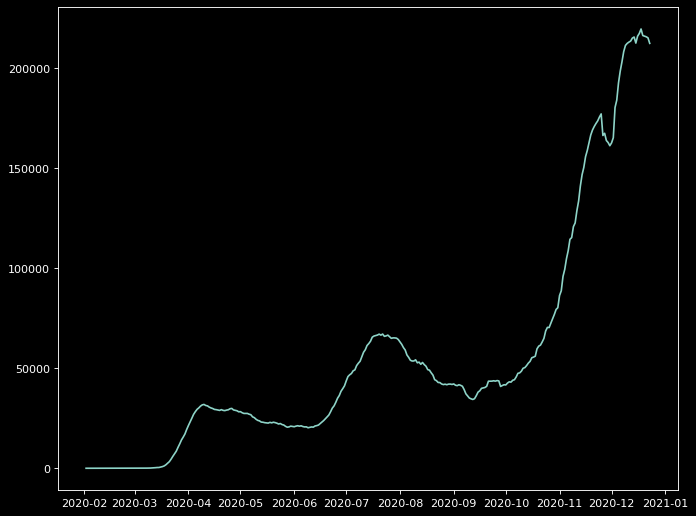

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/25/20


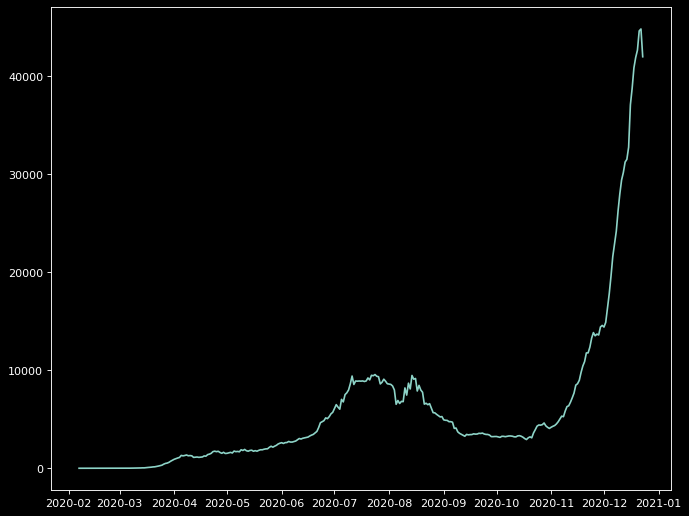

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/25/20


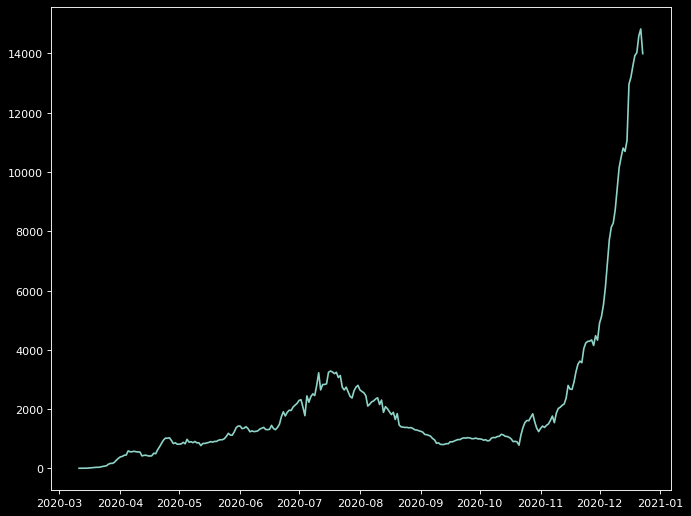

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()